<a href="https://colab.research.google.com/github/sushantsp/Hackathons/blob/master/Airplane_Crash_Severity_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'   Dataset  'Getting started.pdf'


In [0]:
import pandas as pd


train = pd.read_csv('/content/drive/My Drive/Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Dataset/test.csv')

train.columns
train.dtypes
# ALL features are either float or integers. and the output is categorical into 4 values. which will be mapped to 1,2,3,4
train.Violations.value_counts() # this is categorical Variable
train.Accident_Type_Code.value_counts() # This is a Categorical variable


train = pd.get_dummies(train, columns =['Accident_Type_Code','Violations'])
test = pd.get_dummies(test, columns =['Accident_Type_Code','Violations'])

train.columns
# train = train[['Accident_ID', 'Safety_Score', 'Days_Since_Inspection',
#        'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
#        'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric',
#        'Accident_Type_Code_1', 'Accident_Type_Code_2',
#        'Accident_Type_Code_3', 'Accident_Type_Code_4', 'Accident_Type_Code_5',
#        'Accident_Type_Code_6', 'Accident_Type_Code_7', 'Violations_0',
#        'Violations_1', 'Violations_2', 'Violations_3', 'Violations_4',
#        'Violations_5','Severity']]


train = train[['Accident_ID', 'Safety_Score', 'Days_Since_Inspection', 
       'Control_Metric','Severity']]
# 'Severity' is sent to last columns as that is the output. Accident_ID is made first columns since thats the output format.

train.Severity.value_counts().sum() # 10000 values
train.shape # 10000 x 23
# to confirm the values in the output and shape of the train data.
train.Severity.value_counts() # Distribution of the data along output types.

# Mapping all 4 types to numeric values. 
train.Severity = train.Severity.map({'Highly_Fatal_And_Damaging':0,
                                     'Significant_Damage_And_Serious_Injuries':1,
                                     'Minor_Damage_And_Injuries':2,
                                     'Significant_Damage_And_Fatalities':3},)
test.columns
# Adding Accident_ID as the first column to the test data.
# test = test[['Accident_ID','Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
#        'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
#        'Max_Elevation', 'Adverse_Weather_Metric',
#        'Accident_Type_Code_1', 'Accident_Type_Code_2', 'Accident_Type_Code_3',
#        'Accident_Type_Code_4', 'Accident_Type_Code_5', 'Accident_Type_Code_6',
#        'Accident_Type_Code_7', 'Violations_0', 'Violations_1', 'Violations_2',
#        'Violations_3', 'Violations_4', 'Violations_5']]
test = test[['Accident_ID','Safety_Score', 'Days_Since_Inspection','Control_Metric']]

train.shape, test.shape # one extra column in train data which is the output.
# since ID's are not the part of the data input, they are saved into different columns and later will mapped onto
# the output data for submission.
Acc_ID_Train = train.Accident_ID
Acc_ID_Test = test.Accident_ID
# Dropping the Accident ID
train = train.iloc[:,1:]
test = test.iloc[:,1:]
# train= train[(np.abs(stats.zscore(train)) < 4).all(axis=1)]

# Create X_train, y_train and we have test data withour output.
X = train.iloc[:,0:-1]
y = train.iloc[:,[-1]] # severityb

# X.shape, test.shape

In [0]:
from sklearn import datasets, linear_model, metrics 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 0, bootstrap = True,max_features = 'auto')
classifier = RandomForestClassifier(n_estimators = 1800, criterion = 'entropy', random_state = 0, 
                                    bootstrap = False, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 5, max_depth= 70 )

# classifier = RandomForestClassifier(n_estimators = 2500, criterion = 'gini', random_state = 0, 
#                                     bootstrap = False, max_features = 'auto', min_samples_leaf = 1, min_samples_split= 5, max_depth= 75 ) ### GRID SEARCH
classifier.fit(X_train, y_train)
# {'bootstrap': True,
#  max_depth= 20,
#  'max_features': 'sqrt',
#  min_samples_leaf = 1,
#  min_samples_split= 2,
#  'n_estimators': 1000}
# {'bootstrap': False,
#  'criterion': 'entropy',
#  'max_depth': 70,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 5,
#  'n_estimators': 1800}
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([[298,   5,   2,   4],
       [  6, 287,   5,   1],
       [  2,   1, 239,   1],
       [  1,   4,   1, 143]])

In [0]:
metrics.accuracy_score(y_test, y_pred)*100

96.7

In [0]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
accuracies.mean()
# accuracies.std()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.9636666666666667

In [0]:
y_pred  = classifier.predict(test)
sub = pd.DataFrame(Acc_ID_Test)
sub['Severity'] = y_pred.tolist()
sub.Severity = sub.Severity.map({0:'Highly_Fatal_And_Damaging',
                   1:'Significant_Damage_And_Serious_Injuries',
                   2:'Minor_Damage_And_Injuries',
                   3:'Significant_Damage_And_Fatalities'})
sub.to_csv("/content/drive/My Drive/Dataset/RF_submission_RFC_070220.csv",index = None, header=True)

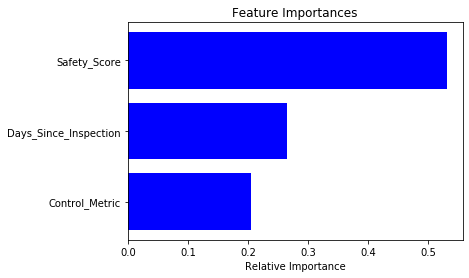

In [0]:
import numpy as np
import matplotlib.pyplot as plt

features = train.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
from sklearn import datasets, linear_model, metrics 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0, bootstrap = True,max_features = 'auto')
# classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0, bootstrap = True,max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 2, max_depth= 20 )
classifier = RandomForestClassifier(n_estimators = 1800, criterion = 'entropy', random_state = 0, 
                                    bootstrap = False, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 5, max_depth= 70 ) ### GOOD

# classifier = RandomForestClassifier(n_estimators = 1500, criterion = 'gini', random_state = 0, 
#                                     bootstrap = False, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 5, max_depth= 75 ) ### GRID SEARCH
# 'bootstrap': False,
#  'criterion': 'gini',
#  'max_depth': 75,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
# #  'min_samples_split': 5,
#  'n_estimators': 1500
classifier.fit(X, y)

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# cm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred  = classifier.predict(test)
# sub = pd.DataFrame(Acc_ID_Test)
# sub['Severity'] = y_pred.tolist()
# sub.Severity = sub.Severity.map({0:'Highly_Fatal_And_Damaging',
#                    1:'Significant_Damage_And_Serious_Injuries',
#                    2:'Minor_Damage_And_Injuries',
#                    3:'Significant_Damage_And_Fatalities'})
# sub.to_csv("/content/drive/My Drive/Dataset/RF_submission_RFC_070220.csv",index = None, header=True)

In [0]:
test_1 = test.copy()
test_1['Severity'] = y_pred.tolist()
test_1.head()

,Safety_Score,Days_Since_Inspection,Control_Metric,Severity
0,19.497717,16,72.151322,0
1,58.173516,15,64.585232,3
2,33.287671,15,64.721969,1
3,3.287671,21,66.362808,0
4,10.867580,18,56.107566,3


In [0]:
new = train.append(test_1)

# Create X_train, y_train and we have test data withour output.
X = new.iloc[:,0:-1]
y = new.iloc[:,[-1]] # severity

from sklearn import datasets, linear_model, metrics 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0, bootstrap = True,max_features = 'auto')
# classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0, bootstrap = True,max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 2, max_depth= 20 )
classifier = RandomForestClassifier(n_estimators = 1800, criterion = 'entropy', random_state = 0, 
                                    bootstrap = False, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 5, max_depth= 70 )
classifier.fit(X, y)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred  = classifier.predict(test)
sub = pd.DataFrame(Acc_ID_Test)
sub['Severity'] = y_pred.tolist()
sub.Severity = sub.Severity.map({0:'Highly_Fatal_And_Damaging',
                   1:'Significant_Damage_And_Serious_Injuries',
                   2:'Minor_Damage_And_Injuries',
                   3:'Significant_Damage_And_Fatalities'})


sub.to_csv("/content/drive/My Drive/Dataset/RF_submission_RFC_comb_080220.csv",index = None, header=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


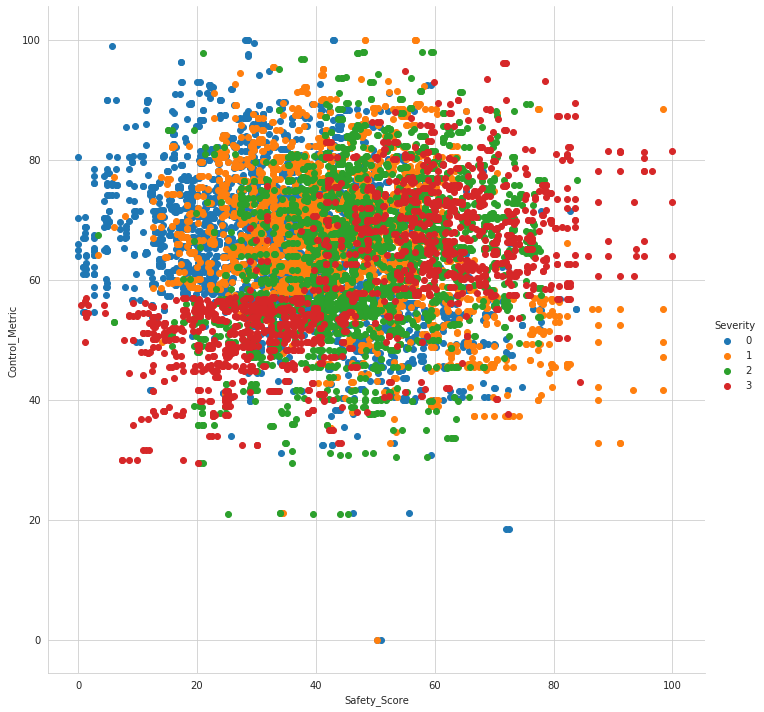

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid');
sns.FacetGrid(train, hue='Severity', size=10).map(plt.scatter, 'Safety_Score','Control_Metric').add_legend() 
# sns.FacetGrid(train, hue='Severity', size=10).map(plt.scatter, 'Turbulence_In_gforces','Control_Metric').add_legend()

**RANDOMISED** **SEARCH** **CV**

---



In [0]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion =  ['entropy','gini']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
from sklearn import datasets, linear_model, metrics 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 16.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf_random.best_params_
# {'bootstrap': False,
#  'criterion': 'entropy',
#  'max_depth': 70,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 5,
#  'n_estimators': 1800}

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1800}

**GRID** **SEARCH** CV

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1500, stop = 2200, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 150, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion =  ['entropy','gini']
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}
pprint(param_grid)



{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': [50, 75, 100, 125, 150, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5, 6],
 'n_estimators': [1500, 1850, 2200]}


In [0]:
from sklearn import datasets, linear_model, metrics 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
# Use the  grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# Create a base model
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)



In [0]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 73.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 131.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 188.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 271.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 398.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 506.5min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 507.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_searc

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [0]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1500}

Combining the data

In [0]:
test_1 = test.copy()
test_1['Severity'] = y_pred.tolist()
test_1.head()

NameError: ignored

In [0]:
new = train.append(test_1)

# Create X_train, y_train and we have test data withour output.
X = new.iloc[:,0:-1]
y = new.iloc[:,[-1]] # severity

from sklearn import datasets, linear_model, metrics 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0, bootstrap = True,max_features = 'auto')
# classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0, bootstrap = True,max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 2, max_depth= 20 )
classifier = RandomForestClassifier(n_estimators = 1800, criterion = 'entropy', random_state = 0, 
                                    bootstrap = False, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split= 5, max_depth= 70 )
classifier.fit(X, y)


y_pred  = classifier.predict(test)
sub = pd.DataFrame(Acc_ID_Test)
sub['Severity'] = y_pred.tolist()
sub.Severity = sub.Severity.map({0:'Highly_Fatal_And_Damaging',
                   1:'Significant_Damage_And_Serious_Injuries',
                   2:'Minor_Damage_And_Injuries',
                   3:'Significant_Damage_And_Fatalities'})


sub.to_csv("/content/drive/My Drive/Dataset/RF_submission_RFC_comb_080220.csv",index = None, header=True)